In [3]:
import re
import pandas as pd
from nltk.stem.porter import PorterStemmer

In [4]:
#file containing tweets
df = pd.read_csv('covid')

In [5]:
#for removing puntuation marks we need to import string
import string
#for removing stopwords we need nltk courpus of stop words
from nltk.corpus import stopwords

In [6]:
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [9]:
df['text'].head()

0    Plz help karo plz no one is helping save us pl...
1    Lawyers who file false cases on innocent India...
2    India's recovery rate for corona virus is almo...
3    @bhatiamanu @asitbaran @lucknow @Rishikesh_ADX...
4    The actual story behind corona vaccination in ...
Name: text, dtype: object

In [18]:
#for pre processing
def text_process(tweet):
    
    #converting tweets into lowercase
    tweet=tweet.lower()
    
    # Replaces URLs with space
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' URL ', tweet)
    
    # Replace @handle with space
    tweet = re.sub(r'@[\S]+', '', tweet)
    
    # Replaces #hashtag with space
    tweet = re.sub(r'#[\S]+', '', tweet)
    
    # Replace multiple spaces with a single space
    tweet = re.sub(r'\s+', ' ', tweet)

    # Check characters to see if they have punctuation
    nopunc = [char for char in tweet if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    result = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return(' '.join(result))


In [19]:
mess = df['text'].apply(text_process)

In [20]:
mess.head()

0    plz help karo plz one helping save us plz save...
1    lawyers file false cases innocent indian men a...
2      indias recovery rate corona virus almost 99 URL
3    please help amplify needy lucknow supplying ho...
4    actual story behind corona vaccination many pa...
Name: text, dtype: object

In [21]:
from textblob import TextBlob

In [40]:
def sentiment_gen(twee):
    pol = TextBlob(twee)
    if pol.sentiment.polarity > 0:
        return 'positive'
    elif pol.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [41]:
sen = []
for i in df.text: 
    sen.append(sentiment_gen(str(i)))

In [42]:
import matplotlib.pyplot as plt

In [43]:
new_df = pd.DataFrame(mess,columns=['Text'])

In [44]:
new_df['Text'] = mess
new_df['Sentiments'] = sen

In [45]:
new_df.head()

,Text,Sentiments
0,plz help karo plz one helping save us plz save...,neutral
1,lawyers file false cases innocent indian men a...,positive
2,indias recovery rate corona virus almost 99 URL,neutral
3,please help amplify needy lucknow supplying ho...,neutral
4,actual story behind corona vaccination many pa...,positive


In [46]:
new_df.to_csv("Processed_tweets", index=False, encoding='utf-8')

In [84]:
val= new_df.groupby('Sentiments').count()

In [85]:
neg,neu,pos = val['Text'][0],val['Text'][1],val['Text'][2]

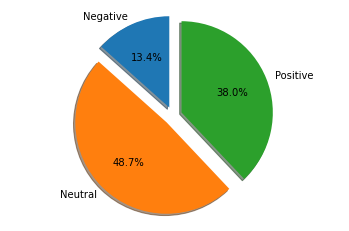

In [90]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Negative', 'Neutral', 'Positive'
sizes = [neg,neu,pos]
explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'neutral')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()